In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import pandas as pd

In [3]:
url = "https://raw.githubusercontent.com/\
Stemanz/python_tutorials/master/datasets/gene_expression.csv"
data = pd.read_csv(url, index_col="gene symbol")

In [4]:
data.head()

,genotypeA_sample1,genotypeA_sample2,genotypeA_sample3,genotypeB_sample1,genotypeB_sample2,genotypeB_sample3,genotypeC_sample1,genotypeC_sample2,genotypeC_sample3
gene symbol,,,,,,,,,
Gm8580,5.767900,5.455137,7.157003,4.900520,3.870285,5.869533,0.279083,0.216800,0.671674
Morf4l1b,109.484714,97.039848,134.512688,127.100854,141.157342,151.387781,21.432392,23.125966,24.864756
Gm6548,39.844572,40.872696,64.365084,59.735055,62.770083,68.343802,21.545728,20.390066,24.260410
Cemip,0.083976,1.620770,4.182101,0.114739,0.313934,0.074213,74.880708,41.889074,87.900036
Stra6l,0.041988,1.246746,2.193053,0.057370,0.156967,0.000000,33.673389,24.493916,45.846949


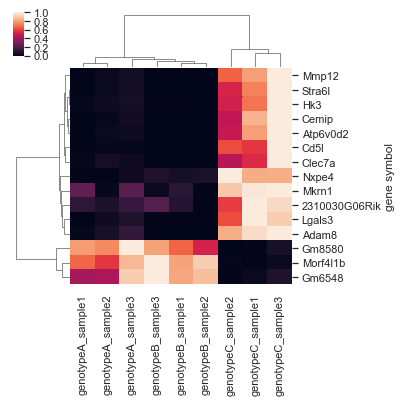

In [5]:
res = sns.clustermap(data, standard_scale=0, figsize=(5,5))

In [11]:
# from the doc:
# To access the reordered row indices, use: clustergrid.dendrogram_row.reordered_ind
# Column indices, use: clustergrid.dendrogram_col.reordered_ind
print(res.dendrogram_row.reordered_ind)

[7, 4, 10, 3, 6, 5, 8, 13, 12, 14, 9, 11, 0, 1, 2]


In [13]:
def extract_clustered_table(res, data):
    """
    input
    =====
    res:     <sns.matrix.ClusterGrid>  the clustermap object
    data:    <pd.DataFrame>            input table
    
    output
    ======
    returns: <pd.DataFrame>            reordered input table
    """
    
    # if sns.clustermap is run with row_cluster=False:
    if res.dendrogram_row is None:
        print("Apparently, rows were not clustered.")
        return -1
    
    if res.dendrogram_col is not None:
        # reordering index and columns
        new_cols = data.columns[res.dendrogram_col.reordered_ind]
        new_ind = data.index[res.dendrogram_row.reordered_ind]
        
        return data.loc[new_ind, new_cols]
    
    else:
        # reordering the index
        new_ind = data.index[res.dendrogram_row.reordered_ind]

        return data.loc[new_ind,:]

In [14]:
ordered = extract_clustered_table(res, data)

In [15]:
ordered

,genotypeA_sample1,genotypeA_sample2,genotypeA_sample3,genotypeB_sample3,genotypeB_sample1,genotypeB_sample2,genotypeC_sample2,genotypeC_sample1,genotypeC_sample3
gene symbol,,,,,,,,,
Mmp12,4.030854,27.366074,51.868253,2.077973,3.671661,3.662565,682.632023,816.088343,1016.434343
Stra6l,0.041988,1.246746,2.193053,0.000000,0.057370,0.156967,24.493916,33.673389,45.846949
Hk3,7.179959,11.033702,15.198367,5.194933,5.392752,4.028821,106.609292,143.734272,201.341846
Cemip,0.083976,1.620770,4.182101,0.074213,0.114739,0.313934,41.889074,74.880708,87.900036
Atp6v0d2,1.007714,9.038908,12.240296,1.038987,1.376873,1.255737,165.509807,270.058616,335.462875
Cd5l,3.568985,41.267291,34.833841,1.706907,1.950570,8.894800,1348.956085,1252.008054,2155.394390
Clec7a,6.088269,15.646662,12.750308,3.562240,4.360097,3.871854,99.766344,121.197996,217.479118
Nxpe4,1.040044,1.088409,1.530037,2.077973,1.687817,1.936450,13.543921,11.508569,11.542958
Mkrn1,65.249450,51.989306,63.904543,52.691467,57.254963,51.066618,102.452361,106.850774,107.617431
